<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [12]:
boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

### Task 1: Become familiar with the dataset

##### The following describes the dataset variables:

·      **CRIM** - per capita crime rate by town

·      **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

·      **INDUS** - proportion of non-retail business acres per town.

·      **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      **NOX** - nitric oxides concentration (parts per 10 million)

·      **RM** - average number of rooms per dwelling

·      **AGE** - proportion of owner-occupied units built prior to 1940

·      **DIS** - weighted distances to five Boston employment centres

·      **RAD** - index of accessibility to radial highways

·      **TAX** - full-value property-tax rate per $10,000

·      **PTRATIO** - pupil-teacher ratio by town

·      **LSTAT** - % lower status of the population

·      **MEDV** - Median value of owner-occupied homes in $1000's




### Task 2: Generate Descriptive Statistics and Visualizations
#### For all visualizations, please include a title in each graph and appropriate labels

#### Generate the following and explain your findings:

**2.1** - For the "Median value of owner-occupied homes" provide a boxplot

**2.2** - Provide a  bar plot for the Charles river variable

**2.3** - Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

**2.4** - Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

**2.5** - Create a histogram for the pupil to teacher ratio variable

In [15]:
# First 5 rows of dataset boston_df
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### 2.1 - For the "Median value of owner-occupied homes" provide a boxplot

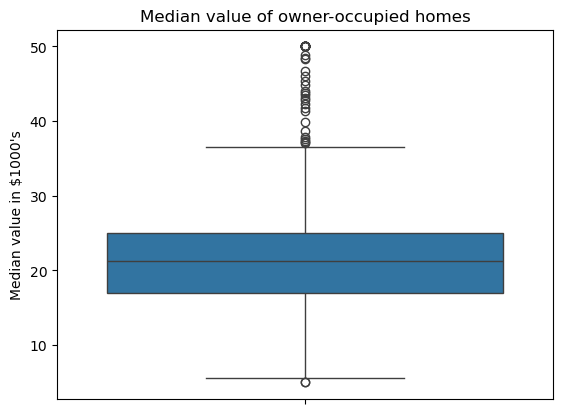

In [17]:
# Create a boxplot for the "MEDV" or "Median value of owner-occupied homes" with appropriate title and legend
sns.boxplot(y = "MEDV", data = boston_df).set(title = "Median value of owner-occupied homes", ylabel = "Median value in $1000's")
plt.show()

The median of the median value of owner-occupied homes is around $20,000, with a very significant spread in values. A lot of house values can be considered outliers with prices above the maximum, with only one outlier in the opposite direction. 

#### 2.2 - Provide a bar plot for the Charles river variable

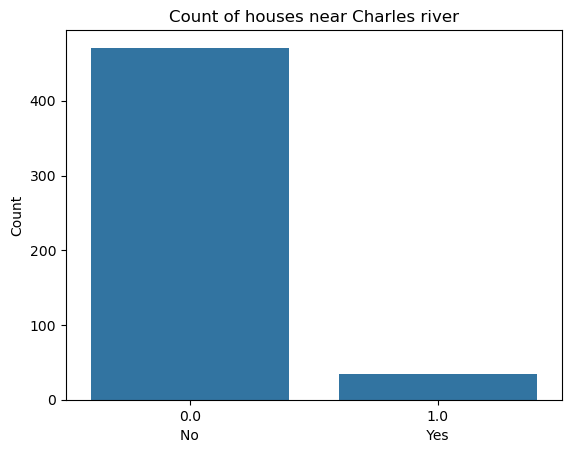

In [20]:
# Create a bar plot for the Charles river variable "CHAS"
sns.countplot(x = "CHAS", data = boston_df).set(title = "Count of houses near Charles river",
                                                ylabel = "Count",
                                                xlabel = "No                                                    Yes")
                                                
plt.show()


A very large majority of houses are not located near the Charles river.

#### 2.3 - Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

C:\Users\lucas\AppData\Local\Temp\ipykernel_3640\3792492551.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  thirtyfive_to_seventy = boston_df[boston_df["AGE"] > 35][boston_df["AGE"] < 70]


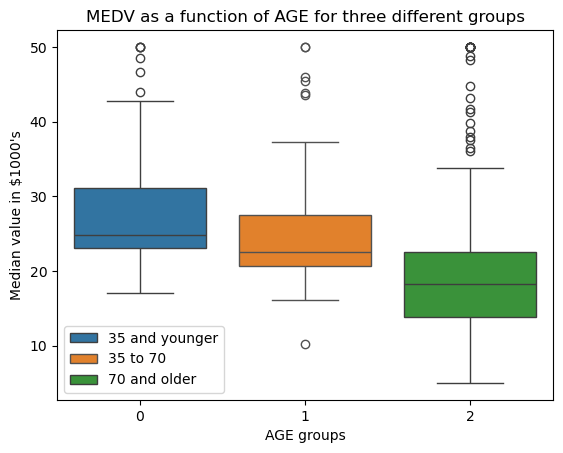

In [23]:
# Discretize the age variable into three groups, 35 & older, 35 to 70 and 70 & older
under_thirtyfive = boston_df[boston_df["AGE"] <= 35]
thirtyfive_to_seventy = boston_df[boston_df["AGE"] > 35][boston_df["AGE"] < 70]
over_seventy = boston_df[boston_df["AGE"] >= 70]

# Create a boxplot for the "MEDV" variable vs the "AGE" variable
sns.boxplot(x = 0, y = under_thirtyfive["MEDV"], label = "35 and younger")
sns.boxplot(x = 1, y = thirtyfive_to_seventy["MEDV"], label = "35 to 70")
sns.boxplot(x = 2, y = over_seventy["MEDV"], label = "70 and older").set(ylabel = "Median value in $1000's", xlabel = "AGE groups")
plt.title("MEDV as a function of AGE for three different groups")
plt.show()

# Below are some checks to ensure approriate partition of dataset
# x = thirtyfive_to_seventy["AGE"] > 70
# x.any()
# y = thirtyfive_to_seventy["AGE"] < 35
# y.any()

Based on the boxplot there is a clear trend of median value of homes going down with age, the 35 and younger group has the largest median value, followed by the 35 to 70 and lastly the 70 and older groups. 

#### 2.4 - Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

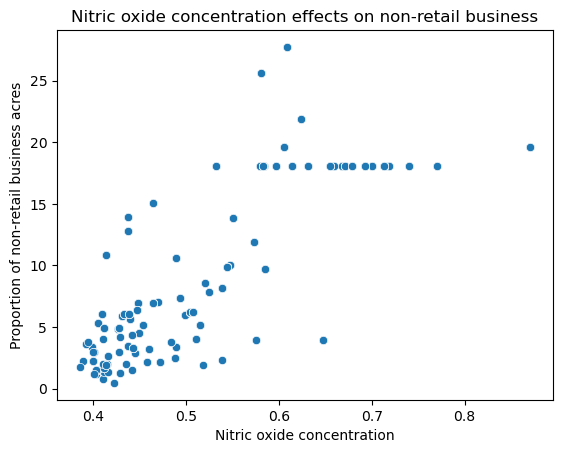

In [26]:
# Create a scatter plot to show relationship between Nitric oxide concentrations "NOX" and proportion of non-retail business acres per town "INDUS"
sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df).set(ylabel = "Proportion of non-retail business acres", xlabel = "Nitric oxide concentration", title = "Nitric oxide concentration effects on non-retail business")
plt.show()

There is a positive relationship between nitric oxide concentration and the proportion of non-retail business acres.

#### 2.5 - Create a histogram for the pupil to teacher ratio variable

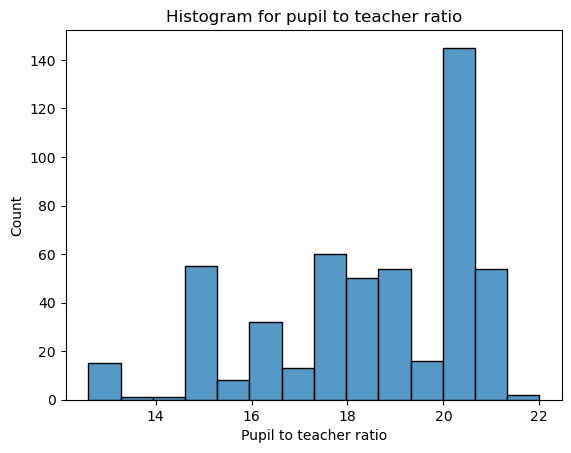

In [29]:
# Create a histogram for the pupil to teacher ratio variable
sns.histplot(boston_df["PTRATIO"]).set(title = "Histogram for pupil to teacher ratio", xlabel = "Pupil to teacher ratio")
plt.show()

There is a concentration of pupil to teacher ratio between 20 and 21. The dominant majority of pupil to teacher ratios are within the range of 14.66 to 21.33.

### Task 3: Use the appropriate tests to answer the questions provided.
#### For each of the following questions;

**3.1** - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**3.2** - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**3.3** - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**3.4** - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

###### Be sure to:

###### State your hypothesis.

###### Use α = 0.05

###### Perform the test Statistics.

###### State the conclusion from the test.

#### 3.1 - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [33]:
scipy.stats.ttest_ind(boston_df["MEDV"], boston_df["CHAS"], equal_var = True)

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

The null hypothesis is that the median value of houses are not affected by being near the Charles river, α = 0.05 will be used to determine whether or not this null hypothesis is rejected. The T-test indicates a pvalue of 1.465 * 10^-305, which is much lower than α = 0.05, indicating that we must reject the null hypothesis. This means that there is a significant difference in the value of houses bounded by the Charles river.

#### 3.2 - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [36]:
scipy.stats.f_oneway(under_thirtyfive["MEDV"], thirtyfive_to_seventy["MEDV"], over_seventy["MEDV"])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

The null hypothesis is that the median values of houses are not changed for each proportion of owner occupied units. The pvalue is found to be 1.71*10^-15, which is much lower than the value of $\alpha$ = 0.05. This indicates that we must reject the null hypothesis because there is a significant difference in MEDV depending on the different AGE groups.

#### 3.3 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [40]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

Based on the Pearson Correlation conducted, the pvalue between the "NOX" and "INDUS" values is 7.91*10^-98, a much lower value than $\alpha$ = 0.05. This indicates that there is significant correlation between the Nitric oxide concentrations and the proportion of non-retail business acres per town, and that we must reject the null hypothesis that there is no such correlation.

#### 3.4 - What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [46]:
# Perform regression analysis to find the relationship between the two values
X = boston_df["DIS"]
y = boston_df["MEDV"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        09:33:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Applying regression analysis, R-squared is found to be 0.062, and by taking the square root value we find the correlation factor of 0.249. The regression also gives us the pvalue which is 1.21*10^-8, and the function coefficient of 1.0916. These values indicate that there is a strong positive correlation between the additional weighted distance to the five Boston employment centres and the median value of owner occupied homes. The null hypothesis of there not existing such correlation is also rejected, due to the pvalue being smaller than $\alpha$ = 0.05.

### Author: Lucas Ugolini San Martin